In [2]:
# importing  libraries
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib  as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## UNIVARIATE ANALYSIS ###

In [5]:
df.describe ()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

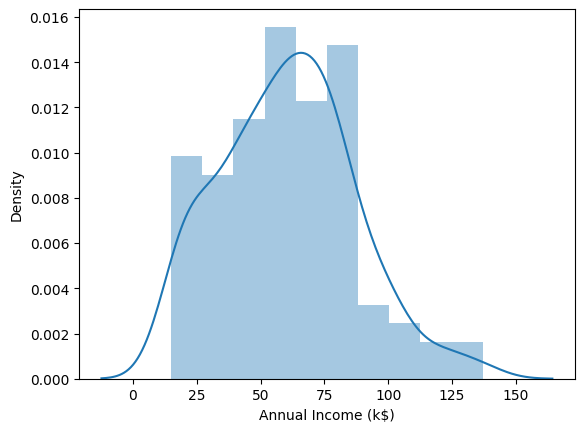

In [6]:
sns.distplot(df ['Annual Income (k$)'])

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

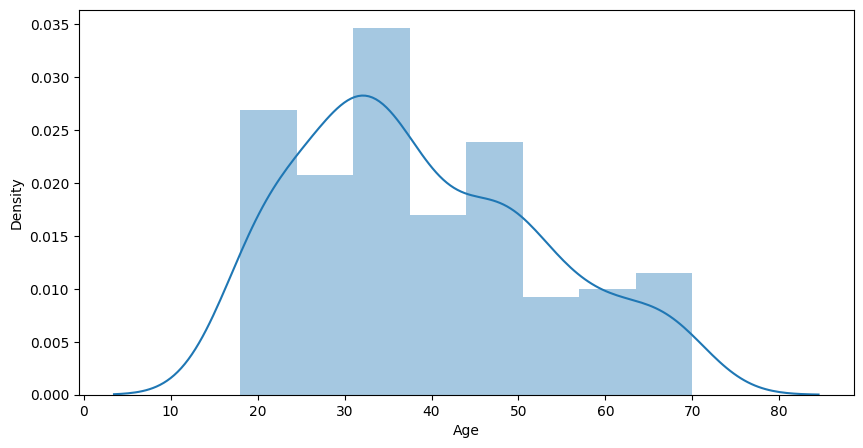

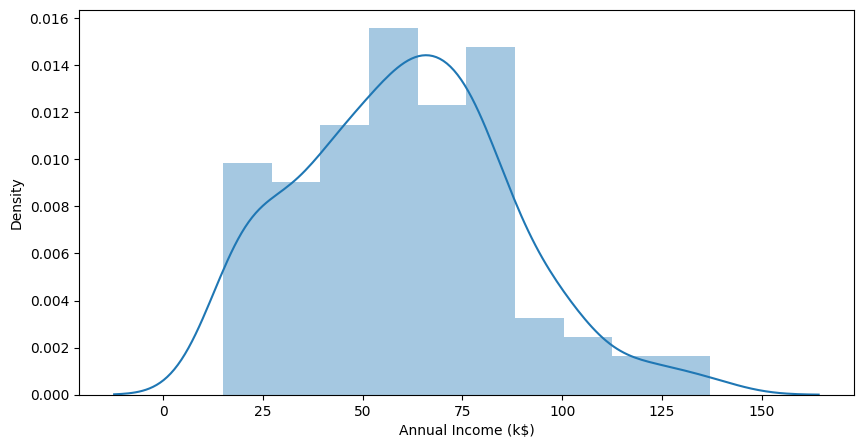

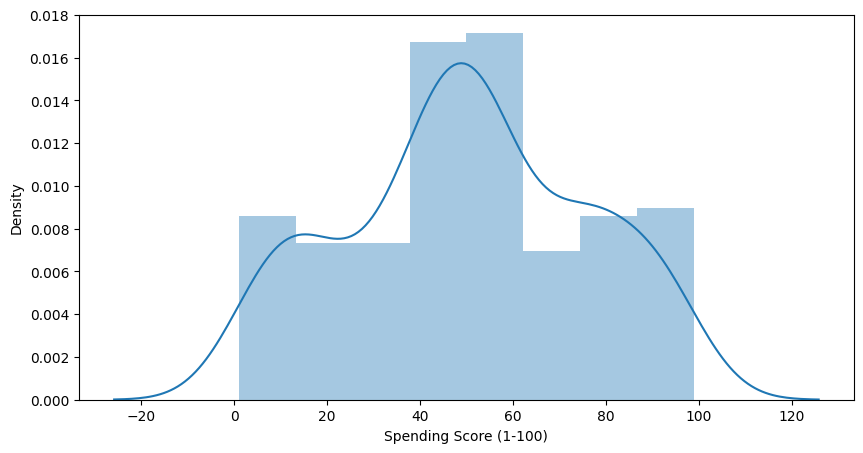

In [8]:
import matplotlib.pyplot as plt

columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])

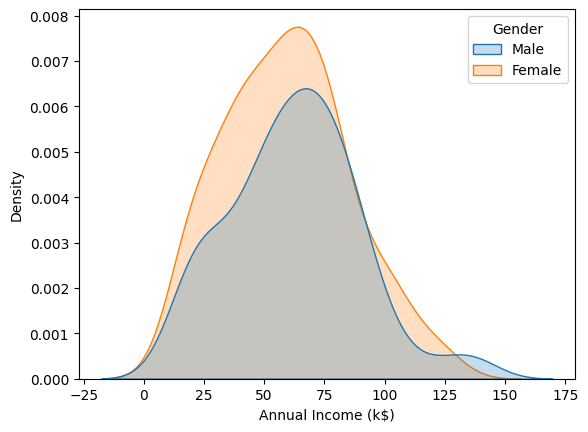

In [9]:
sns.kdeplot(data=df, x="Annual Income (k$)", shade=True, hue="Gender");

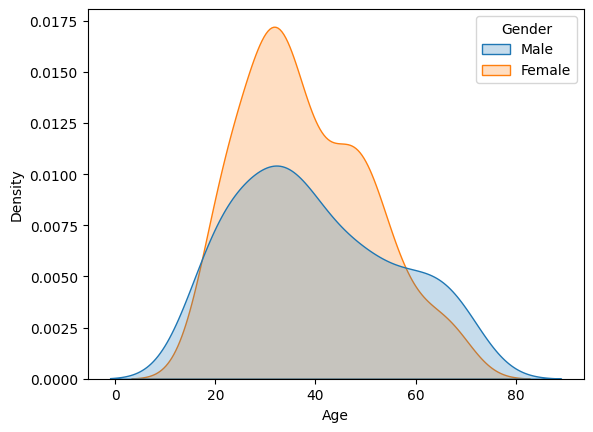

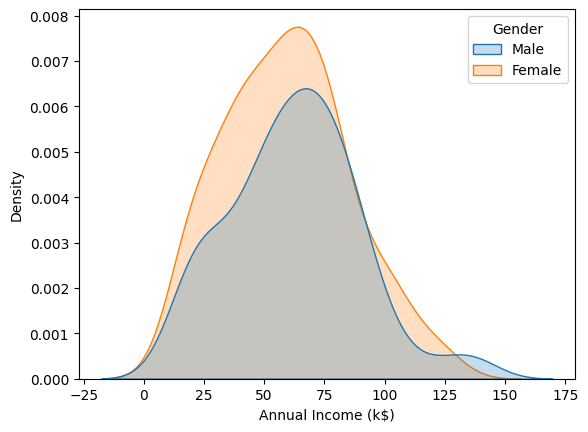

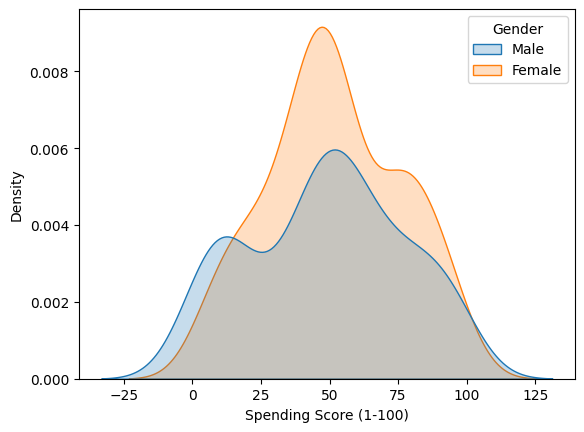

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')

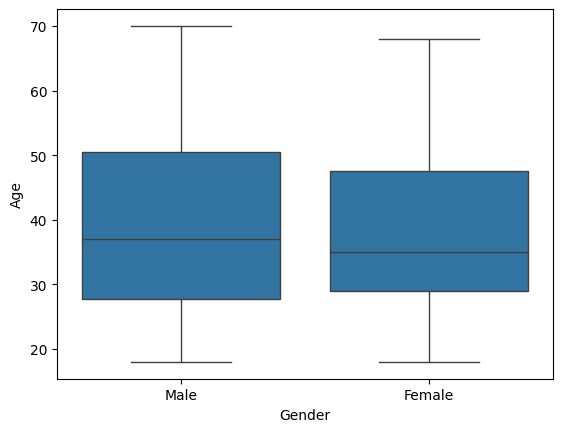

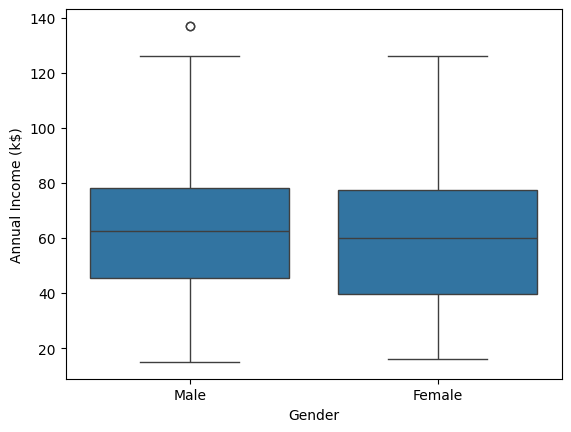

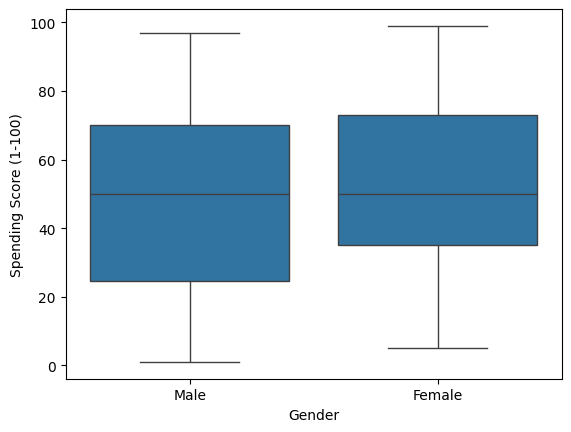

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [12]:
df["Gender"].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


## BIVARIATE ANALYSIS ##

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

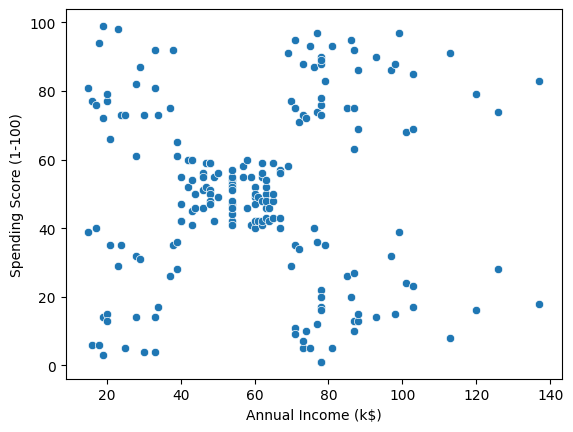

In [13]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)")

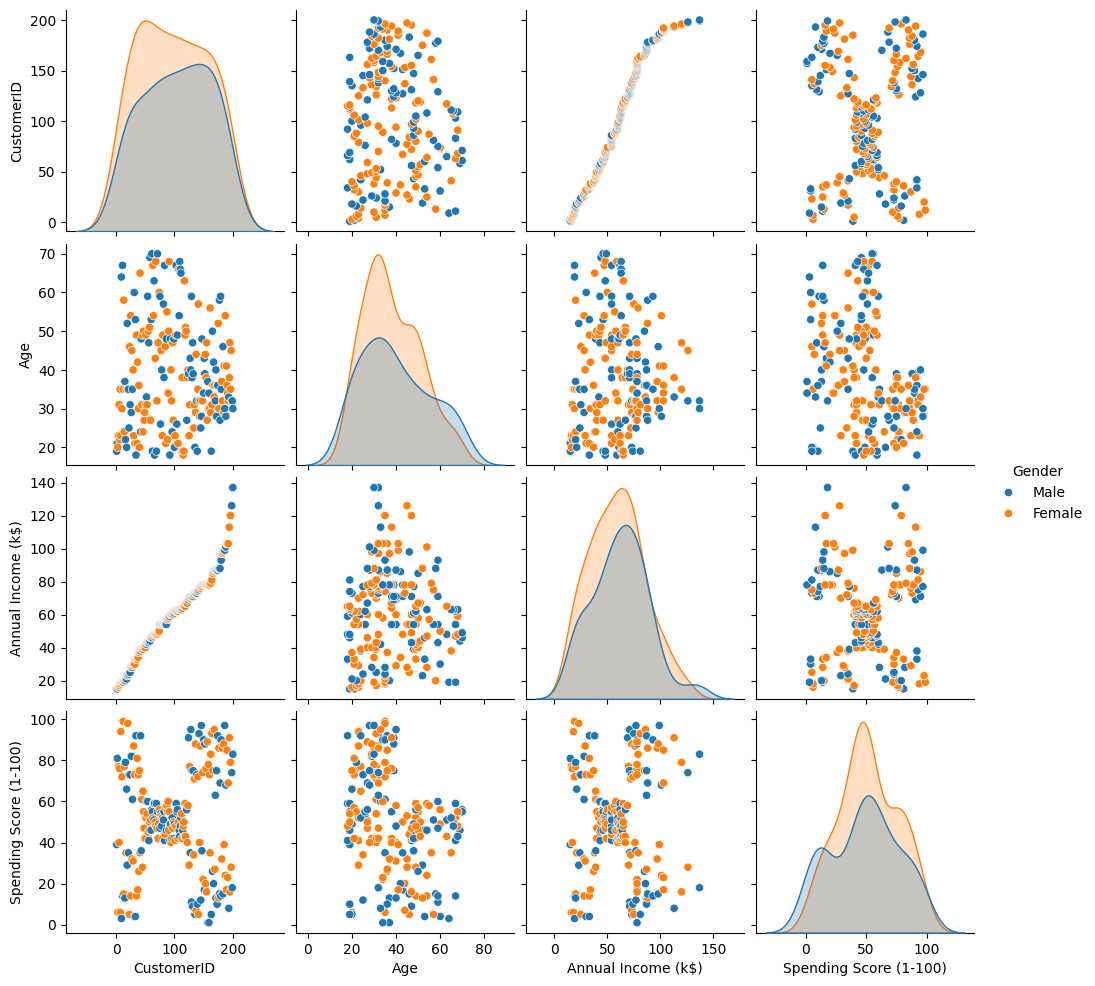

In [15]:
sns.pairplot(df, hue="Gender")

In [17]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [20]:
df.drop(['CustomerID', 'Gender'], axis=1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

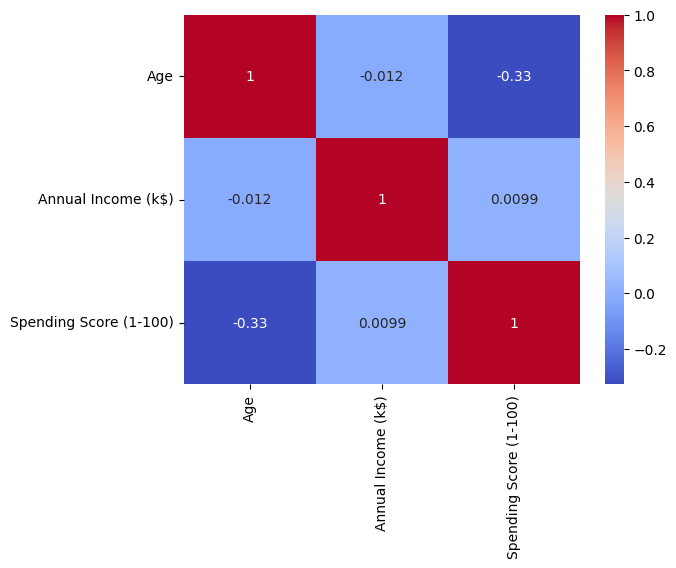

In [23]:
sns.heatmap(df.drop(['CustomerID', 'Gender'], axis=1).corr(), annot=True, cmap='coolwarm')

## Clustering-Univariate, Bivariate, Multivariate

In [24]:
clustering1=KMeans(n_clusters=3)

In [25]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [26]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [27]:
df['Income_cluster']=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [33]:
df['Income_cluster'].value_counts()

,count
Income_cluster,
0,86
2,58
1,56


In [34]:
clustering1.inertia_

25640.457784396807

In [36]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [37]:
intertia_scores

[137277.2800000002,
 49761.737012987025,
 25640.457784396807,
 15460.429512270892,
 8717.458097165998,
 5728.855832763724,
 3931.9880952380995,
 3486.7871572871577,
 2423.1307303807303,
 1835.0458707958705]

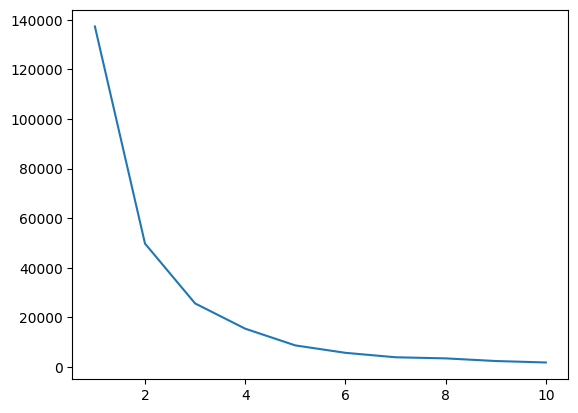

In [38]:
plt.plot(range(1,11),intertia_scores)

In [39]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income_cluster'],
      dtype='object')

In [41]:
df.groupby('Income_cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


#Bivariate Clustering

In [42]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3


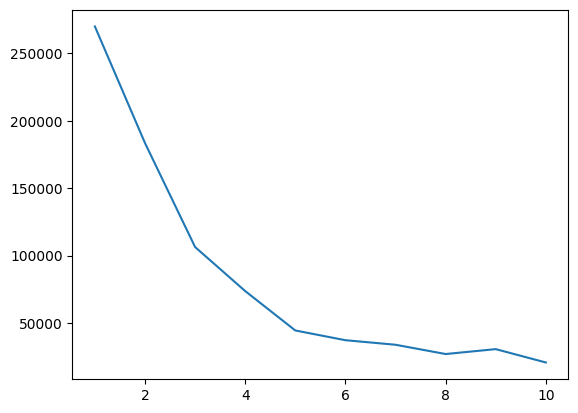

In [43]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [45]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

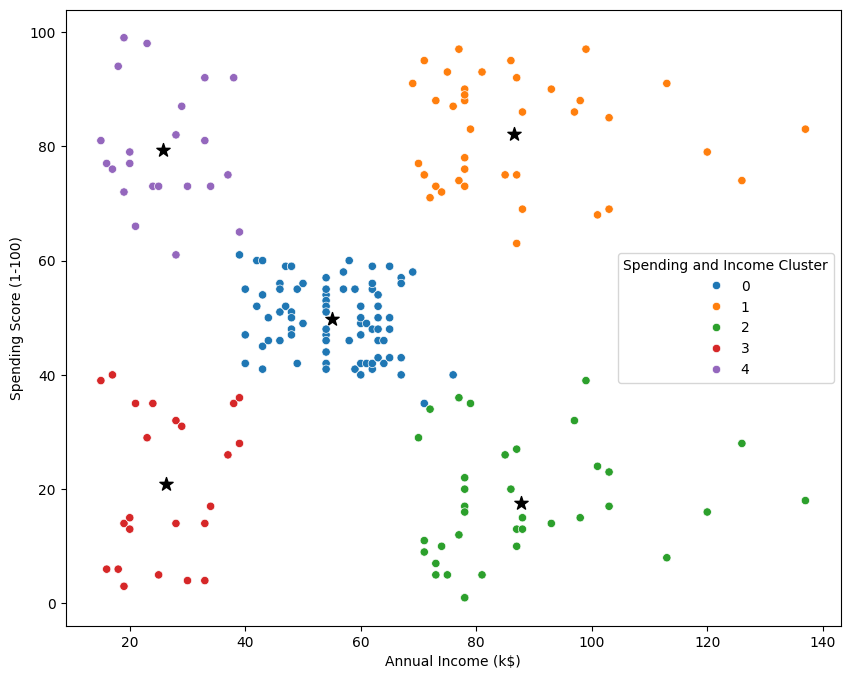

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [47]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.538462,0.461538
2,0.472222,0.527778
3,0.608696,0.391304
4,0.590909,0.409091


In [49]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,32.692308,86.538462,82.128205
2,40.666667,87.750000,17.583333
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


# Multivariate Clustering

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
 scale = StandardScaler()

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3


In [53]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,3,True
1,2,21,15,81,2,4,True
2,3,20,16,6,2,3,False
3,4,23,16,77,2,4,False
4,5,31,17,40,2,3,False


In [54]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [55]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [56]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [57]:
dff = scale.fit_transform(dff)

In [60]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


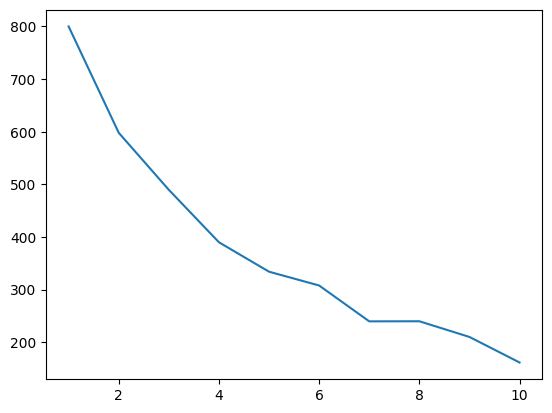

In [61]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [62]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,1,2
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,2


In [63]:
df.to_csv('Mall_Customers_Clustered.csv')